In [3]:
using CairoMakie, ForwardDiff, LinearAlgebra
CairoMakie.activate!()
Makie.inline!(true)

true

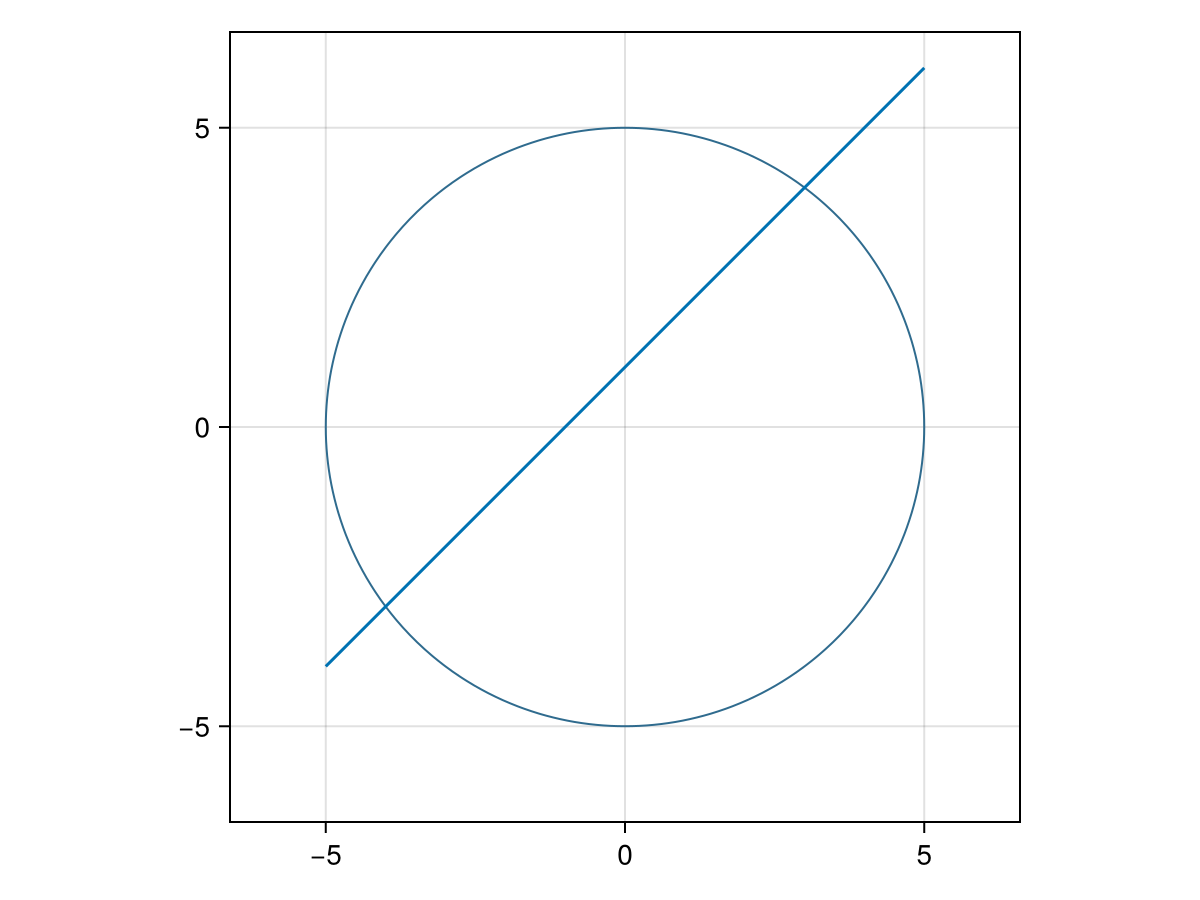

In [4]:
x = y = LinRange(-6,6,101)
fig, ax = contour(x,y, (x,y) -> x^2+y^2, levels = [25], axis = (aspect = AxisAspect(1),))
lines!(ax,-5..5, x-> x+1)
fig

In [5]:
save("../../assets/plots/linear-algebra/circle-intersect.png", fig)

CairoMakie.Screen{IMAGE}


In [5]:
f(x,y) = x^2+y^2-25
g(x,y) = x-y+1

g (generic function with 1 method)

In [6]:
F(x::Vector{<:Real}) = [x[1]^2+x[2]^2-25, x[1]-x[2]+1]

F (generic function with 1 method)

In [7]:
F([1,1])

2-element Vector{Int64}:
 -23
   1

In [8]:
ForwardDiff.jacobian(F,[1,1])

2×2 Matrix{Int64}:
 2   2
 1  -1

In [9]:
Δ = ForwardDiff.jacobian(F,[1,1]) \ F([1,1])

2-element Vector{Float64}:
 -5.25
 -6.25

In [16]:
function newton(F::Function, x0::Vector{<:Real}; max_steps::Int = 20, eps::Real = 1e-6)
  for _ = 1:max_steps
    J = ForwardDiff.jacobian(F,x0)
    det(J) ≈ 0 && error("Newton's method reached a singular point of the Jacobian.")
    Δ = - J \ F(x0)
    norm(Δ) < eps && return x0
    x0 += Δ
    @show x0
  end
  error("Newton's method didn't converge in $max_steps steps.")
end

newton (generic function with 1 method)

In [17]:
newton(F,[1,1], max_steps = 30)

x0 = [6.25, 7.25]
x0 = [3.7824074074074074, 4.782407407407407]
x0 = [3.0714739739739745, 4.0714739739739745]
x0 = [3.0007151849618476, 4.000715184961847]
x0 = [3.0000000730550047, 4.000000073055005]


2-element Vector{Float64}:
 3.0000000730550047
 4.000000073055005

In [19]:
newton(F,[1.1,-1])

x0 = [146.04999999999995, 147.04999999999995]
x0 = [72.81679460934832, 73.81679460934834]
x0 = [36.24193887291423, 37.24193887291424]
x0 = [18.037672669544126, 19.037672669544126]
x0 = [9.099244585537157, 10.09924458553716]
x0 = [4.937693335278354, 5.937693335278353]
x0 = [3.3452433991838886, 4.345243399183889]
x0 = [3.0154987594160287, 4.015498759416029]
x0 = [3.00003416464631, 4.00003416464631]
x0 = [3.000000000166745, 4.000000000166745]


2-element Vector{Float64}:
 3.000000000166745
 4.000000000166745

In [ ]:
G(x::Vector{<:Real}) = [x[1]^2/36+x[2]^2/9 + x[3]/4-1, x[3]^2-x[1]^2 - 6, 2*x[1]+3*x[2]]

G (generic function with 1 method)

In [71]:
newton(G,[1,1,1], max_steps = 100)

x0 = [0.5882352941176467, 0.9411764705882355, 3.5882352941176467]
x0 = [-2.7927001645078295, 3.19513344300522, 2.1241475140151103]
x0 = [-1.3002828820475458, 2.2001885880316974, 2.348101726419304]
x0 = [-0.764049146382351, 1.8426994309215672, 2.5147560822342694]
x0 = [-0.6743710518372071, 1.7829140345581382, 2.539159244562338]
x0 = [-0.67168862300502, 1.7811257486700134, 2.5399131834127187]
x0 = [-0.6716862234790009, 1.7811241489860006, 2.5399138534222323]


3-element Vector{Float64}:
 -0.6716862234790009
  1.7811241489860006
  2.5399138534222323

In [77]:
using GLMakie
GLMakie.activate!()
H(x,y,z) = 36x.^2+9y.^2+4z.^2-72
H2(x,y,z) = z.^2 - x.^2 - 6
H3(x,y,z) = 2*x+3*y-4
xs = ys = zs = range(-6, 6, length=200)
fig, ax = contour(xs, ys, zs, H, levels=[0], alpha=0.2)
contour!(ax,xs, ys, zs, H2, levels= [0], alpha = 0.2)
contour!(ax,xs,ys,zs, H3, levels = [-4], alpha = 0.2)
fig

In [21]:
A = [
        0   1   0   0   0   0   0   0   0   0   0   0   0 ;
        0   0   0   0   0   2   0   0   0   0   0   0   0 ;
        0   0   -1   0   0   0   0   0   0   0   0   0   0 ;
        0   0   0   0   0   0   0   0   0   1   0   0   0 ;
        0   0   0   0   -2   0   0   0   0   0   0   0   0 ;
        1   0   0   0   0   0   0   0   0   0   0   0   0 ;
        0   0   0   0   0   0   0   0   0   0   0   0   -1 ;
        0   0   0   0   0   0   2   0   0   0   0   0   0 ;
        0   0   0   -1   0   0   0   0   0   0   0   0   0 ;
        0   0   0   0   0   -2   0   0   0   0   0   0   0 ;
        0   0   0   0   0   0   0   0   0   0   0    1  0 ;
        0   0   0   0   0   0   0   0   0   0   2   0   0 ;
        0   0   0   0   0   0   0   0   1   0   0   0   0 ]

13×13 Matrix{Int64}:
 0  1   0   0   0   0  0  0  0  0  0  0   0
 0  0   0   0   0   2  0  0  0  0  0  0   0
 0  0  -1   0   0   0  0  0  0  0  0  0   0
 0  0   0   0   0   0  0  0  0  1  0  0   0
 0  0   0   0  -2   0  0  0  0  0  0  0   0
 1  0   0   0   0   0  0  0  0  0  0  0   0
 0  0   0   0   0   0  0  0  0  0  0  0  -1
 0  0   0   0   0   0  2  0  0  0  0  0   0
 0  0   0  -1   0   0  0  0  0  0  0  0   0
 0  0   0   0   0  -2  0  0  0  0  0  0   0
 0  0   0   0   0   0  0  0  0  0  0  1   0
 0  0   0   0   0   0  0  0  0  0  2  0   0
 0  0   0   0   0   0  0  0  1  0  0  0   0

In [22]:
sizeof(A)

1352

In [23]:
using SparseArrays
SA = SparseMatrixCSC(A)

13×13 SparseMatrixCSC{Int64, Int64} with 13 stored entries:
 ⋅  1   ⋅   ⋅   ⋅   ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅
 ⋅  ⋅   ⋅   ⋅   ⋅   2  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅
 ⋅  ⋅  -1   ⋅   ⋅   ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅
 ⋅  ⋅   ⋅   ⋅   ⋅   ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅   ⋅
 ⋅  ⋅   ⋅   ⋅  -2   ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅
 1  ⋅   ⋅   ⋅   ⋅   ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅
 ⋅  ⋅   ⋅   ⋅   ⋅   ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  -1
 ⋅  ⋅   ⋅   ⋅   ⋅   ⋅  2  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅
 ⋅  ⋅   ⋅  -1   ⋅   ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅
 ⋅  ⋅   ⋅   ⋅   ⋅  -2  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅   ⋅
 ⋅  ⋅   ⋅   ⋅   ⋅   ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1   ⋅
 ⋅  ⋅   ⋅   ⋅   ⋅   ⋅  ⋅  ⋅  ⋅  ⋅  2  ⋅   ⋅
 ⋅  ⋅   ⋅   ⋅   ⋅   ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅   ⋅

In [24]:
sizeof(SA)

40

In [26]:
R = sparsevec([1,5,7,12,13],[-1,5,10,3,5])

13-element SparseVector{Int64, Int64} with 5 stored entries:
  [1 ]  =  -1
  [5 ]  =  5
  [7 ]  =  10
  [12]  =  3
  [13]  =  5